**背景：**

“超级引擎”是一家专门生产汽车引擎的公司，根据政府发布的新排放要求，**引擎排放平均值要低于20ppm**
（ppm是英文百万分之一的缩写）。

公司抽取出10台引擎供测试使用，每一台的排放水平如下：

15.6 16.2 22.5 20.5 16.4 19.4 16.6 17.9 12.7 13.9

那么怎么知道，公司生产的引擎是否符合政府规定呢？

# 描述统计分析

我们开展调查研究并计算统计结果时，会在报告的第一部分进行描述统计分析，例如平均值和标准差。描述统计量是研究的核心。告诉我们研究中发生的情况，应该始终报告出来。

In [1]:
# 导入包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 样本数据集
dataSer = pd.Series([15.6, 16.2, 22.5, 20.5, 16.4,
                     19.4, 16.6, 17.9, 12.7, 13.9])

In [3]:
# 样本平均值
sample_mean = dataSer.mean()
'''
数据集的标准差和样本标准差的区别：数据集的标准差公式除以的是n，样本标准差公式除以的是n-1。
样本标准差，用途是用样本标准差估计出总体标准差，pandas计算的标准差，默认除以的是n-1，也就是计算出的是样本标准差。
'''
# 样本标准差
sample_std = dataSer.std()

print('样本平均值 =', sample_mean, '单位：ppm')
print('样本标准差 =', sample_std, '单位：ppm')

样本平均值 = 17.169999999999998 单位：ppm
样本标准差 = 2.9814426038413018 单位：ppm


# 推论统计分析

推论统计分析报告中包括：**假设检验，置信区间，效应量**

## 假设检验

### 问题是什么？

#### 零假设和备选假设

要研究的问题是：这些样本数据是否满足新标准呢？

根据这个问题可以提出下面两个互为相反的假设：

零假设H0：公司引擎排放不满足标准，也就是平均值μ>=20。这里的20是政府规定新标准的最低排放值。

> 零假设总是表述为研究没有改变，没有效果，不起作用等，这里就是不满足标准。

备选假设H1：公司引擎排放满足标准，也就是平均值μ<20

#### 检验类型

检验类型有很多种，因为这里只有1个样本，所以选择单样本检验。

#### 抽样分布类型

我们还要判断抽样分布是哪种类型，因为抽样分布的类型决定了后面计算p值的不同。

在汽车引擎案例中，样本大小是10（小于30），属于小样本。那小样本的抽样分布是否满足t分布呢？因为t分布还要求数据集近似正态分布，所以下面图片我们看下样本数据集的分布长什么样。

C:\Users\Richard\Anaconda3\envs\py3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


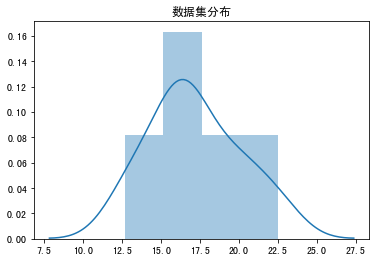

In [5]:
import seaborn as sns

# 查看数据集分布
sns.distplot(dataSer)
plt.title('数据集分布')
plt.show()

通过观察上面数据集分布图，数据集近似正态分布，满足t分布的使用条件，所以抽样分布是t分布，自由度df = n - 1 = 10 - 1 = 9。

#### 检验方向

单尾检验（左尾，右尾），还是双尾检验？

因为备选假设是公司引擎排放满足标准，也就是平均值μ<20，所以我们使用单尾检验中的左尾检验

#### 总结

综合以上分析，**本次假设检验是单样本t检验，单尾检验中的左尾**。

### 证据是什么？

在零假设成立前提下，得到样本平均值的概率p是多少？

计算p值步骤也很简单：

1）计算出标准误差

2）计算t值

3）根据t值，查找t表格，得到概率p值

In [6]:
'''
方法一：手动计算，熟悉过程
1）计算标准误差
标准误差 = 样本标准差 / (n的开方)
'''
n = 10

se = sample_std / (np.sqrt(n))

'''
2）计算t值
t =（样本平均值 - 总体平均值）/ 标准误差
'''
pop_mean = 20

t = (sample_mean - pop_mean) / se

print('标准误差se =', se)
print('t =', t)

'''
3)然后查t表，自由度df = n - 1，看该t值对应的概率：p = 0.0149
'''

标准误差se = 0.9428149341201592
t = -3.001649525885985


'\n3)然后查t表，自由度df=n-1,看该t值对应的概率：p=0.0149\n'

In [7]:
'''
方法二：用python统计包scipy自动计算
'''
# 导入统计模块（stats）
from scipy import stats

# 总体平均值
pop_mean = 20

'''
ttest_1samp：单独样本t检验
返回的第1个值t是假设检验计算出的（t值），
第2个值p是双尾检验的p值
'''
t, p_twoTail = stats.ttest_1samp(dataSer, pop_mean)

print('t值 =', t, '双尾检验的p值 =', p_twoTail) 

t值 = -3.001649525885985 双尾检验的p值 = 0.014916414248897527


In [8]:
'''
因为scipy计算出的是双尾检验的t值和p值，但是我们这里是左尾检验。
根据对称性，双尾的p值是对应单尾p值的2倍
'''
# 单尾检验的p值
p_oneTail = p_twoTail / 2

print('单尾检验的p值 =', p_oneTail)

单尾检验的p值 = 0.0074582071244487635


### 判断标准是什么？

In [9]:
# 判断标准（显著水平）使用 alpha = 5%
alpha = 0.05

### 做出结论

In [10]:
'''
左尾判断条件：t < 0 and  p < 判断标准（显著水平）alpha
右尾判断条件：t > 0 and  p < 判断标准（显著水平）alpha
'''
# 做出结论
if(t < 0 and p_oneTail < alpha): 
    print('拒绝零假设，有统计显著，也就是汽车引擎排放满足标准')
else: 
    print('接受零假设，没有统计显著，也就是汽车引擎排放不满足标准')

拒绝零假设，有统计显著，也就是汽车引擎排放满足标准


APA格式来报告假设检验的结果。
 
假设检验结论中，需要包含以下几点信息：

1）检验类型

包括检验类型，抽样分布，检验方向

首先执行的是哪种类型的检验？在此示例中是单样本t检验，接着在括号中写出自由度，写上等号，然后给出t值，保留两位小数。写上逗号，然后给出p值，同样保留两位小数，然后输出逗号，并指明检验方向。是单尾检验还是双尾检验。

2）精确的p值

然后给出p值，同样保留两位小数；

3）给出检验方向

例如是单尾检验还是双尾检验；

4）显著性水平

`独立样本t(9) = -3.00，p = .0074 (α = 5%)，单尾检验（左尾）`

## 置信区间

APA格式的置信区间：`单个平均值的置信区间，95% CI = (a,b)`

1）置信区间的类型

在这个案例里，我们是单个平均值的置信区间

2）置信水平和区间的上下限

置信水平（简写为CI），这里是95%的置信水平，区间 [a, b]

In [11]:
'''
1）置信水平对应的t值（t_ci）
查t表格可以得到，95%的置信水平，自由度是n-1对应的t值
2）计算上下限
置信区间上限a = 样本平均值 - t_ci × 标准误差
置信区间下限b = 样本平均值 - t_ci × 标准误差
'''

t_ci = 2.262
# 使用scipy计算标准误差
se = stats.sem(dataSer)
# 置信区间上限
a = sample_mean - t_ci * se
# 置信区间下限
b = sample_mean + t_ci * se

In [12]:
print('单个平均值的置信区间，95置信水平 CI = (%f, %f)' %(a, b))

单个平均值的置信区间，95置信水平 CI = (15.037353, 19.302647)


## 效应量

In [13]:
'''
效应量：差异指标 Cohen's d
'''
d = (sample_mean - pop_mean) / sample_std
'''
效应量：相关度指标 R2
'''
# 样本大小
n = 10
# 自由度
df = n - 1
R2 = (t*t) / (t * t + df)

print('d =', d)
print('R2 =', R2)

d = -0.9492049239364257
R2 = 0.5002748453994631


# 数据分析报告

1、描述统计分析

样本平均值17.17ppm，样本标准差2.98ppm

2、推论统计分析

1）假设检验

独立样本t(9) = -3.00, p = .0074(α= 5%)，单尾检验（左尾）

公司引擎排放满足标准

2）置信区间

单个平均值的置信区间，95% CI = (15.04, 19.30)

3）效应量

d = -0.95
